In [1]:
import os, re
import pandas as pd
import numpy as np
import json

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 22

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

### reading from database: once stable move outside

In [2]:
def get_sql_df(exp_version=None):
  import sqlite3 as sql
  from glob import glob as glob
  db_fpath = 'csw_mturk_spring19.db'
  with sql.connect(db_fpath) as conn:
    # connection objecs represent the database
    # cursor objects point to rows in the database
    c = conn.cursor()

    # list tables in database
    c.execute("SELECT name FROM sqlite_master WHERE type='table'")
    tables_in_db = c.fetchall()
    table_name = "CSWfall18" # table name must be constant to prevent repeat subjects

    # table header
    c.execute("PRAGMA table_info(%s)"%table_name)
    col_names = [i[1] for i in c.fetchall()]

    # select everything within table
    db_datastring = c.execute("""SELECT * FROM %s"""%table_name).fetchall()
    sql_df = pd.DataFrame(db_datastring,columns=col_names)
    
    # remove unneeded rows 
    sql_df = sql_df[sql_df['mode'] != 'debug'] # debug rows
    sql_df = sql_df[pd.notnull(sql_df['datastring'])] # rows with no datastring 
    # return only select code version
    versions = sql_df.codeversion.unique()
    print('exp versions found in table:')
    for v in versions: print(v)
    # if version not specified, take latest
    if exp_version==None:
      exp_version = versions[-1]
    print('\n-loading code version:',exp_version)
    sql_df = sql_df[sql_df.codeversion == exp_version]
    print('N =',len(sql_df),'subjects')
  return sql_df
_ = get_sql_df()

exp versions found in table:
10.13.18
1000cl
1000clq
9010cl
i1000cl
20B1000cl
RT01B1000cl
csw1000block40.04.07.19
csw1000block01.04.25.19
csw1000block02.04.26.19
csw1000rand50.04.29.19
csw1000block01intheloc.05.01.19
csw1000rand01.05.03.19
csw1000block02.05.07.19
csw1000boldmdp.05.09.19
csw1000insertedblock0.09.22.19
csw1000insertedblock1.09.30.19
csw1000insertedblock1.10.07.19
csw1000insertedblock0.10.08.19
csw1000insertedblock2.10.09.19
csw1000insertedblock2.10.10.19

-loading code version: csw1000insertedblock2.10.10.19
N = 56 subjects


'40 blocked': '1000clq',
'interleaved': 'i1000cl',

In [3]:
CONDITION = 'inserted_middle_rep'

In [4]:
if CONDITION == 'interleaved':
  assert False, 'wrong interleaved code, use RT01B1000cl'
  dataset_code = 'i1000cl'
elif CONDITION == 'interleaved_rep':
  dataset_code = 'csw1000block01.04.25.19'
elif CONDITION == 'blocked':
  dataset_code = '1000clq'
elif CONDITION == 'blocked_rep':
  dataset_code = 'csw1000block40.04.07.19'
elif CONDITION == 'explicit_interleaved':
  dataset_code = 'csw1000boldmdp.05.09.19'
elif CONDITION == 'inserted_early':
  dataset_code = 'csw1000insertedblock0.09.22.19'
elif CONDITION == 'inserted_early_rep':
  dataset_code = 'csw1000insertedblock0.10.08.19'
elif CONDITION == 'inserted_middle':
  dataset_code = 'csw1000insertedblock1.09.30.19'
elif CONDITION == 'inserted_middle_rep':
  dataset_code = 'csw1000insertedblock1.10.07.19'
elif CONDITION == 'inserted_late':
  dataset_code = 'csw1000insertedblock2.10.09.19'
elif CONDITION == 'inserted_late_rep':
  dataset_code = 'csw1000insertedblock2.10.10.19'
else:
  print("INVALID CONDITION")
  assert False

In [5]:
sql_df = get_sql_df(dataset_code)
sql_df = sql_df # keep first 50 only
Nsubs,_ = sql_df.shape

exp versions found in table:
10.13.18
1000cl
1000clq
9010cl
i1000cl
20B1000cl
RT01B1000cl
csw1000block40.04.07.19
csw1000block01.04.25.19
csw1000block02.04.26.19
csw1000rand50.04.29.19
csw1000block01intheloc.05.01.19
csw1000rand01.05.03.19
csw1000block02.05.07.19
csw1000boldmdp.05.09.19
csw1000insertedblock0.09.22.19
csw1000insertedblock1.09.30.19
csw1000insertedblock1.10.07.19
csw1000insertedblock0.10.08.19
csw1000insertedblock2.10.09.19
csw1000insertedblock2.10.10.19

-loading code version: csw1000insertedblock1.10.07.19
N = 51 subjects


In [6]:
sql_df

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,mode,datastring
1428,A1JJYY622DGE5L:3QFUFYSY9ZBZSNN86EFS5JIF9UT4FW,3QFUFYSY9ZBZSNN86EFS5JIF9UT4FW,A1JJYY622DGE5L,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,107.11.182.13,chrome,windows,en-US,6,0,csw1000insertedblock1.10.07.19,2019-10-07 10:16:36.318009,None,2019-10-07 10:57:38.144766,3.82,7,live,"{""condition"": 6, ""counterbalance"": 0, ""assignm..."
1429,A2H96F2UOLQBFW:3LOZAJ85YE96PVZ62U2QIBLOTL4X2V,3LOZAJ85YE96PVZ62U2QIBLOTL4X2V,A2H96F2UOLQBFW,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,198.147.22.152,chrome,windows,en-US,7,0,csw1000insertedblock1.10.07.19,2019-10-07 11:11:58.904781,None,2019-10-07 12:08:32.298816,2.00,7,live,"{""condition"": 7, ""counterbalance"": 0, ""assignm..."
1430,AF7K0UX7GIU9S:3MTMREQS4WEG5YPK54ZJMAQFW7TAWP,3MTMREQS4WEG5YPK54ZJMAQFW7TAWP,AF7K0UX7GIU9S,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,107.11.253.35,chrome,windows,en-US,58,0,csw1000insertedblock1.10.07.19,2019-10-07 11:28:18.260088,None,2019-10-07 12:34:21.214171,2.00,7,live,"{""condition"": 58, ""counterbalance"": 0, ""assign..."
1434,A1W5Y0RP1IAYQR:320DUZ38G8IV952OK58ET67AS6JGJY,320DUZ38G8IV952OK58ET67AS6JGJY,A1W5Y0RP1IAYQR,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,73.196.176.47,firefox,windows,en-US,39,0,csw1000insertedblock1.10.07.19,2019-10-07 11:49:47.751460,None,2019-10-07 12:52:00.830308,2.00,7,live,"{""condition"": 39, ""counterbalance"": 0, ""assign..."
1435,A2ZQCHONMAJZF:3A0EX8ZRN9KPDDPCQJH32IV1PX0BY6,3A0EX8ZRN9KPDDPCQJH32IV1PX0BY6,A2ZQCHONMAJZF,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,97.94.131.8,firefox,linux,en-US,23,0,csw1000insertedblock1.10.07.19,2019-10-07 12:05:08.498409,None,2019-10-07 12:37:28.742632,3.94,7,live,"{""condition"": 23, ""counterbalance"": 0, ""assign..."
1436,A9KPD7Y55PU9Q:3JBT3HLQF9YRMX0R5A1NB99SCWAZPZ,3JBT3HLQF9YRMX0R5A1NB99SCWAZPZ,A9KPD7Y55PU9Q,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,68.32.241.45,chrome,windows,en-US,50,0,csw1000insertedblock1.10.07.19,2019-10-07 12:22:28.257472,None,2019-10-07 13:28:32.999694,3.87,7,live,"{""condition"": 50, ""counterbalance"": 0, ""assign..."
1437,A31A7EU388VBSE:3C44YUNSI2LOJWVVDSCQKHQPOE0PDQ,3C44YUNSI2LOJWVVDSCQKHQPOE0PDQ,A31A7EU388VBSE,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,196.247.50.4,chrome,windows,en-US,24,0,csw1000insertedblock1.10.07.19,2019-10-07 12:22:29.814429,None,2019-10-07 13:21:04.106333,2.00,7,live,"{""condition"": 24, ""counterbalance"": 0, ""assign..."
1439,A2WUMRRE9070N8:38BQUHLA9XW92QP7BLYEE78TNNWMOO,38BQUHLA9XW92QP7BLYEE78TNNWMOO,A2WUMRRE9070N8,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,99.174.219.225,chrome,windows,en-US,43,0,csw1000insertedblock1.10.07.19,2019-10-07 12:22:36.305607,None,2019-10-07 13:01:55.312559,3.90,7,live,"{""condition"": 43, ""counterbalance"": 0, ""assign..."
1440,A18T7E73TNGOKP:3SITXWYCNW50D8Z2LNV1J4OSNSXXBF,3SITXWYCNW50D8Z2LNV1J4OSNSXXBF,A18T7E73TNGOKP,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,208.233.39.21,firefox,windows,en-US,90,0,csw1000insertedblock1.10.07.19,2019-10-07 12:23:23.793766,None,2019-10-07 13:09:27.286545,2.00,7,live,"{""condition"": 90, ""counterbalance"": 0, ""assign..."
1442,A2YS9SGN7HL06B:3O6CYIULEEX0K73IB9GAMB293BYUW0,3O6CYIULEEX0K73IB9GAMB293BYUW0,A2YS9SGN7HL06B,3XJOUITW8UNDEDVE9TMS162ZN9ZQTV,68.63.29.151,chrome,chromeos,en-US,69,0,csw1000insertedblock1.10.07.19,2019-10-07 12:24:08.819697,None,2019-10-07 13:14:28.116190,3.91,7,live,"{""condition"": 69, ""counterbalance"": 0, ""assign..."


### comments

In [7]:
# I = -5 # -3,-5
# for i in range(len(sql_df)):
#   print(i)
#   resp = json.loads(
#           pd.DataFrame(
#             json.loads(
#               sql_df.iloc[i]['datastring'])['data']
#           ).iloc[I].loc['trialdata']['responses'])['Q0']
#   if len(resp):
#     print('--\n')
#     print(resp)

### make dataframe

In [8]:
def get_block_indices(subj_df,num_stories=110,num_blocks=11):
  """ given a subj_df
  returns the indices of when blocks begins and ends
  which can be used to index a block of stories in subj_df 
  """
  # get indices for begining of stories
  begin_story_bool = subj_df.state == 'BEGIN'
  begin_story_idx = subj_df[begin_story_bool].index
  # get indices for begin and end of blocks
  block_linsp = np.arange(0,109,10)
  begin_block_idx = begin_story_idx[block_linsp]
  end_block_idx = np.hstack([begin_block_idx[1:],np.array([len(subj_df)])])
  return begin_block_idx,end_block_idx

def include_block_idx(subj_df):
  """ inplace column
  """
  subj_df['block'] = 0
  begin_block_idx,end_block_idx = get_block_indices(subj_df)
  for block_num,(bidx,eidx) in enumerate(zip(begin_block_idx,end_block_idx)):
    subj_df.loc[bidx:eidx,'block'] = int(block_num)
  return subj_df

def include_story_idx(subj_df,num_stories):
  """ inplace include column with stories
  """
  bidx = subj_df.loc[subj_df['state']=='BEGIN'].index
  subj_df.loc[bidx,'story'] = np.arange(num_stories,dtype=np.int)
  subj_df.story = np.floor(subj_df.story.interpolate()).astype('int')
  return subj_df

In [9]:
frnode2depth = lambda x: DEPTH_DICT[x]
DEPTH_DICT = {np.nan:100,'BEGIN':0,
              'NODE11':1,'NODE12':1,
              'NODE21':2,'NODE22':2,
              'NODE31':3,'NODE32':3,
              'END':4}

def make_subj_df(psiturk_dstr,num_instruction_trials=3,stories_per_block=40):
  # initialize
  subj_df = pd.DataFrame([t['trialdata'] for t in json.loads(psiturk_dstr)['data']])
  # remove instruction trials
  subj_df = subj_df.iloc[num_instruction_trials:]
  # subj response
  subj_df['response_right'] = subj_df['key_press'] == 39.0 
  subj_df['true_on_right'] = (subj_df['true_on_right'] == "True")
  subj_df['correct_response'] = (subj_df['true_on_right'] == subj_df['response_right'])
  # only keep some columns
  subj_df = subj_df[['type','qtype',
                     'state','fromnode','true_tonode','false_tonode',
                     'rfc','true_rfc','false_rfc',
                     'response_right','true_on_right','correct_response',]]
  ## customizing
  # story columns
  subj_df = include_story_idx(subj_df,num_stories=200)
  # edges
  subj_df['edge'] = subj_df['fromnode'] + subj_df['true_tonode']
  # blocks
  subj_df['block'] = subj_df.story//stories_per_block
  # depth
  subj_df['depth']=subj_df.fromnode.apply(frnode2depth)
  return subj_df

psiturk_dstr = sql_df['datastring'].iloc[0] 
subj_df = make_subj_df(psiturk_dstr)
subj_df

,type,qtype,state,fromnode,true_tonode,false_tonode,rfc,true_rfc,false_rfc,response_right,true_on_right,correct_response,story,edge,block,depth
3,story,NaN,BEGIN,NaN,NaN,NaN,subject-Jeremy_location-Jungle,NaN,NaN,False,False,True,0,NaN,0,100
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100
5,question,transQ,NaN,BEGIN,LOCNODEB,LOCNODEC,NaN,subject-Jeremy_location-Jungle,subject-Jeremy_location-Jungle,False,False,True,0,BEGINLOCNODEB,0,0
6,instruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100
7,story,NaN,LOCNODEB,NaN,NaN,NaN,subject-Jeremy_location-Jungle,NaN,NaN,False,False,True,0,NaN,0,100
8,instruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100
9,story,NaN,NODE11,NaN,NaN,NaN,subject-Jeremy_location-Jungle,NaN,NaN,False,False,True,0,NaN,0,100
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100
11,question,transQ,NaN,NODE11,NODE22,NODE21,NaN,subject-Jeremy_location-Jungle,subject-Jeremy_location-Jungle,False,True,False,0,NODE11NODE22,0,1
12,instruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,0,NaN,0,100


### make subject and group dataframes 

In [10]:
def make_group_df(sql_df):
  """ looping `make_subj_df`
  """
  subj_df_L = []
  # loop making subject dfs
  for s in range(len(sql_df)):
    psiturk_dstr = sql_df['datastring'].iloc[s] 
    subj_df = make_subj_df(psiturk_dstr)
    subj_df['subjnum']=s
    subj_df_L.append(subj_df)
  # make group dfs
  group_df = pd.concat(subj_df_L)
  # reshape
  group_df = group_df.set_index(['subjnum','block','story','depth',group_df.index])
  return group_df

group_df = make_group_df(sql_df)
group_df

type    qtype     state  \
subjnum block story depth                                                 
0       0     0     100   3                    story      NaN     BEGIN   
                          4                      NaN      NaN       NaN   
                    0     5                 question   transQ       NaN   
                    100   6              instruction      NaN       NaN   
                          7                    story      NaN  LOCNODEB   
                          8              instruction      NaN       NaN   
                          9                    story      NaN    NODE11   
                          10                     NaN      NaN       NaN   
                    1     11                question   transQ       NaN   
                    100   12             instruction      NaN       NaN   
                          13                   story      NaN    NODE22   
                          14                     NaN      NaN       NaN   
                    2     15                question   transQ       NaN   
                    100   16             instruction      NaN       NaN   
                          17                   story      NaN    NODE31   
                          18             instruction      NaN       NaN   
                          19                   story      NaN       END   
                          20    between_story_marker      NaN       NaN   
                          21             instruction      NaN       NaN   
              1     100   22                   story      NaN     BEGIN   
                          23                     NaN      NaN       NaN   
                    0     24                question   transQ       NaN   
                    100   25             instruction      NaN       NaN   
                          26                   story      NaN  LOCNODEC   
                          27             instruction      NaN       NaN   
                          28                   story      NaN    NODE12   
                          29                     NaN      NaN       NaN   
                    1     30                question   transQ       NaN   
                    100   31             instruction      NaN       NaN   
                          32                   story      NaN    NODE22   
...                                              ...      ...       ...   
50      4     198   100   3631                 story      NaN    NODE21   
                          3632                   NaN      NaN       NaN   
                    2     3633              question   transQ       NaN   
                    100   3634           instruction      NaN       NaN   
                          3635                 story      NaN    NODE31   
                          3636           instruction      NaN       NaN   
                          3637                 story      NaN       END   
                          3638  between_story_marker      NaN       NaN   
                          3639           instruction      NaN       NaN   
              199   100   3640                 story      NaN     BEGIN   
                          3641           instruction      NaN       NaN   
                          3642                 story      NaN  LOCNODEB   
                          3643           instruction      NaN       NaN   
                          3644                 story      NaN    NODE12   
                          3645                   NaN      NaN       NaN   
                    1     3646              question   transQ       NaN   
                    100   3647           instruction      NaN       NaN   
                          3648                 story      NaN    NODE21   
                          3649                   NaN      NaN       NaN   
                    2     3650              question  fillerQ       NaN   
                    100   3651           instruction      NaN       NaN  

### split dataframes GLOBAL VARIABLES

In [11]:
# should i make these global vars?
# i.e. access them within funs without passing
_,_,(_,group_qdf),(_,group_sdf) = group_df.groupby('type')
(_,group_fqdf),(_,group_tqdf) = group_qdf.groupby('qtype')
group_tqdf

type   qtype state fromnode true_tonode  \
subjnum block story depth                                                     
0       0     0     0     5     question  transQ   NaN    BEGIN    LOCNODEB   
                    1     11    question  transQ   NaN   NODE11      NODE22   
                    2     15    question  transQ   NaN   NODE22      NODE31   
              1     0     24    question  transQ   NaN    BEGIN    LOCNODEC   
                    1     30    question  transQ   NaN   NODE12      NODE22   
                    2     34    question  transQ   NaN   NODE22      NODE32   
              2     0     43    question  transQ   NaN    BEGIN    LOCNODEB   
                    1     49    question  transQ   NaN   NODE11      NODE22   
                    2     53    question  transQ   NaN   NODE22      NODE31   
              3     0     62    question  transQ   NaN    BEGIN    LOCNODEC   
                    1     68    question  transQ   NaN   NODE12      NODE22   
                    2     72    question  transQ   NaN   NODE22      NODE32   
              4     0     81    question  transQ   NaN    BEGIN    LOCNODEB   
                    1     87    question  transQ   NaN   NODE12      NODE21   
                    2     91    question  transQ   NaN   NODE21      NODE32   
              5     0     100   question  transQ   NaN    BEGIN    LOCNODEC   
                    1     106   question  transQ   NaN   NODE12      NODE22   
              6     0     119   question  transQ   NaN    BEGIN    LOCNODEB   
                    1     125   question  transQ   NaN   NODE11      NODE22   
                    2     129   question  transQ   NaN   NODE22      NODE31   
              7     0     138   question  transQ   NaN    BEGIN    LOCNODEC   
                    1     144   question  transQ   NaN   NODE11      NODE21   
                    2     148   question  transQ   NaN   NODE21      NODE31   
              8     1     161   question  transQ   NaN   NODE12      NODE21   
                    2     165   question  transQ   NaN   NODE21      NODE32   
              9     0     174   question  transQ   NaN    BEGIN    LOCNODEC   
                    1     180   question  transQ   NaN   NODE11      NODE21   
                    2     184   question  transQ   NaN   NODE21      NODE31   
              10    0     193   question  transQ   NaN    BEGIN    LOCNODEB   
                    1     199   question  transQ   NaN   NODE11      NODE22   
...                                  ...     ...   ...      ...         ...   
50      4     182   2     3361  question  transQ   NaN   NODE21      NODE32   
              183   1     3374  question  transQ   NaN   NODE12      NODE21   
              184   1     3391  question  transQ   NaN   NODE11      NODE21   
              185   1     3408  question  transQ   NaN   NODE12      NODE21   
                    2     3412  question  transQ   NaN   NODE21      NODE32   
              186   1     3425  question  transQ   NaN   NODE11      NODE21   
                    2     3429  question  transQ   NaN   NODE21      NODE31   
              187   1     3442  question  transQ   NaN   NODE12      NODE22   
              188   1     3459  question  transQ   NaN   NODE11      NODE21   
                    2     3463  question  transQ   NaN   NODE21      NODE31   
              189   1     3476  question  transQ   NaN   NODE11      NODE22   
              190   1     3493  question  transQ   NaN   NODE12      NODE22   
                    2     3497  question  transQ   NaN   NODE22      NODE32   
              191   1     3510  question  transQ   NaN   NODE12      NODE21   
                    2     3514  question  transQ   NaN   NODE21      NODE32   
              192   1     3527  question  transQ   NaN   NODE12      NODE21   
                    2     3531  question  transQ   NaN   NODE21      NODE32   
              193   1     3544  question  transQ   NaN   NODE11      NODE21   
       

In [12]:
def get_thresholded_tqdf(group_fqdf=group_fqdf,threshold=0.8):
  """ takes in dataframe
  returns dataframe
  """
  # thresholding
  sub_mask = group_fqdf.correct_response.groupby('subjnum').mean() > threshold
  sub_mask = sub_mask[sub_mask].index.values
  masked_group_df = group_tqdf.loc[sub_mask,:,:]
  return masked_group_df

def select_transition_probes(group_tqdf):
  """ remove transition from BEGIN node"""
  return group_tqdf[group_tqdf['fromnode']!='BEGIN']
  

# plotting

In [13]:
## threshold based on filler questions
THRESHOLD = 0.9
plt_group_tqdf = get_thresholded_tqdf(threshold=THRESHOLD)
## remove begin node probe (only happens during training)
plt_group_tqdf = select_transition_probes(plt_group_tqdf)

24 51


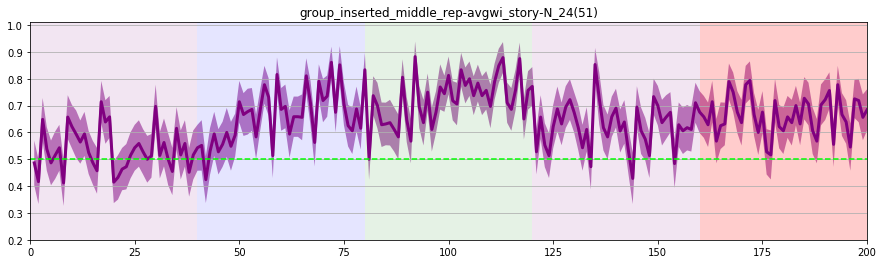

In [14]:
num_subs = len(plt_group_tqdf.index.get_level_values('subjnum').unique())

# plotting
grouping = 'story'
plt.figure(figsize=(15,4))
M = plt_group_tqdf.correct_response.groupby([grouping]).mean()
N = plt_group_tqdf.correct_response.groupby([grouping]).count()
S = plt_group_tqdf.correct_response.groupby([grouping]).std()/np.sqrt(N)
# plt.bar(np.arange(len(M))+1,M,yerr=S)
plt.plot(np.arange(len(M))+1,M,c='purple',lw=3)
plt.fill_between(np.arange(1,201),M-S,M+S,
                  facecolor='purple',alpha=0.5)

plt.axhline(0.5,c='lime',ls='--')
plt.yticks(np.arange(0,1.1,.1))

plt.ylim(0.2,1.01)
plt.grid(axis='y')

block_size = 40
if CONDITION == 'blocked' or CONDITION == 'blocked_rep':
  cL = ['green','blue','green','blue']
elif CONDITION == 'interleaved' or CONDITION == 'interleaved_rep' or CONDITION == 'interleaved_explicit':
  cL = ['yellow']
  block_size = 160
elif CONDITION == 'inserted_early' or CONDITION == 'inserted_early_rep':
  cL = ['blue','green','purple','purple']
elif CONDITION == 'inserted_middle' or CONDITION == 'inserted_middle_rep':
  cL = ['purple','blue','green','purple']
elif CONDITION == 'inserted_late' or CONDITION == 'inserted_late_rep':
  cL = ['purple','purple','blue','green']

for idx,t1 in enumerate(range(0,160,block_size)):
  t2 = t1+block_size+1
  plt.fill_between(np.arange(t1,t2),0,1.05,
                  facecolor=cL[idx],alpha=0.1)
plt.fill_between(np.arange(160,201),0,1.05,
                  facecolor='red',alpha=0.2)

#   plt.axvline(t1,c='r',alpha=.5)
  
plt.xlim(0,200)
print(num_subs,Nsubs)
title = 'group_%s-avgwi_%s-N_%i(%i)'%(CONDITION,grouping,num_subs,Nsubs)
plt.title(title)
plt.savefig('figures/2020/group/'+title)
# plt.savefig('../presentations/psychonomics19/'+title,format='svg')


# subjects plot

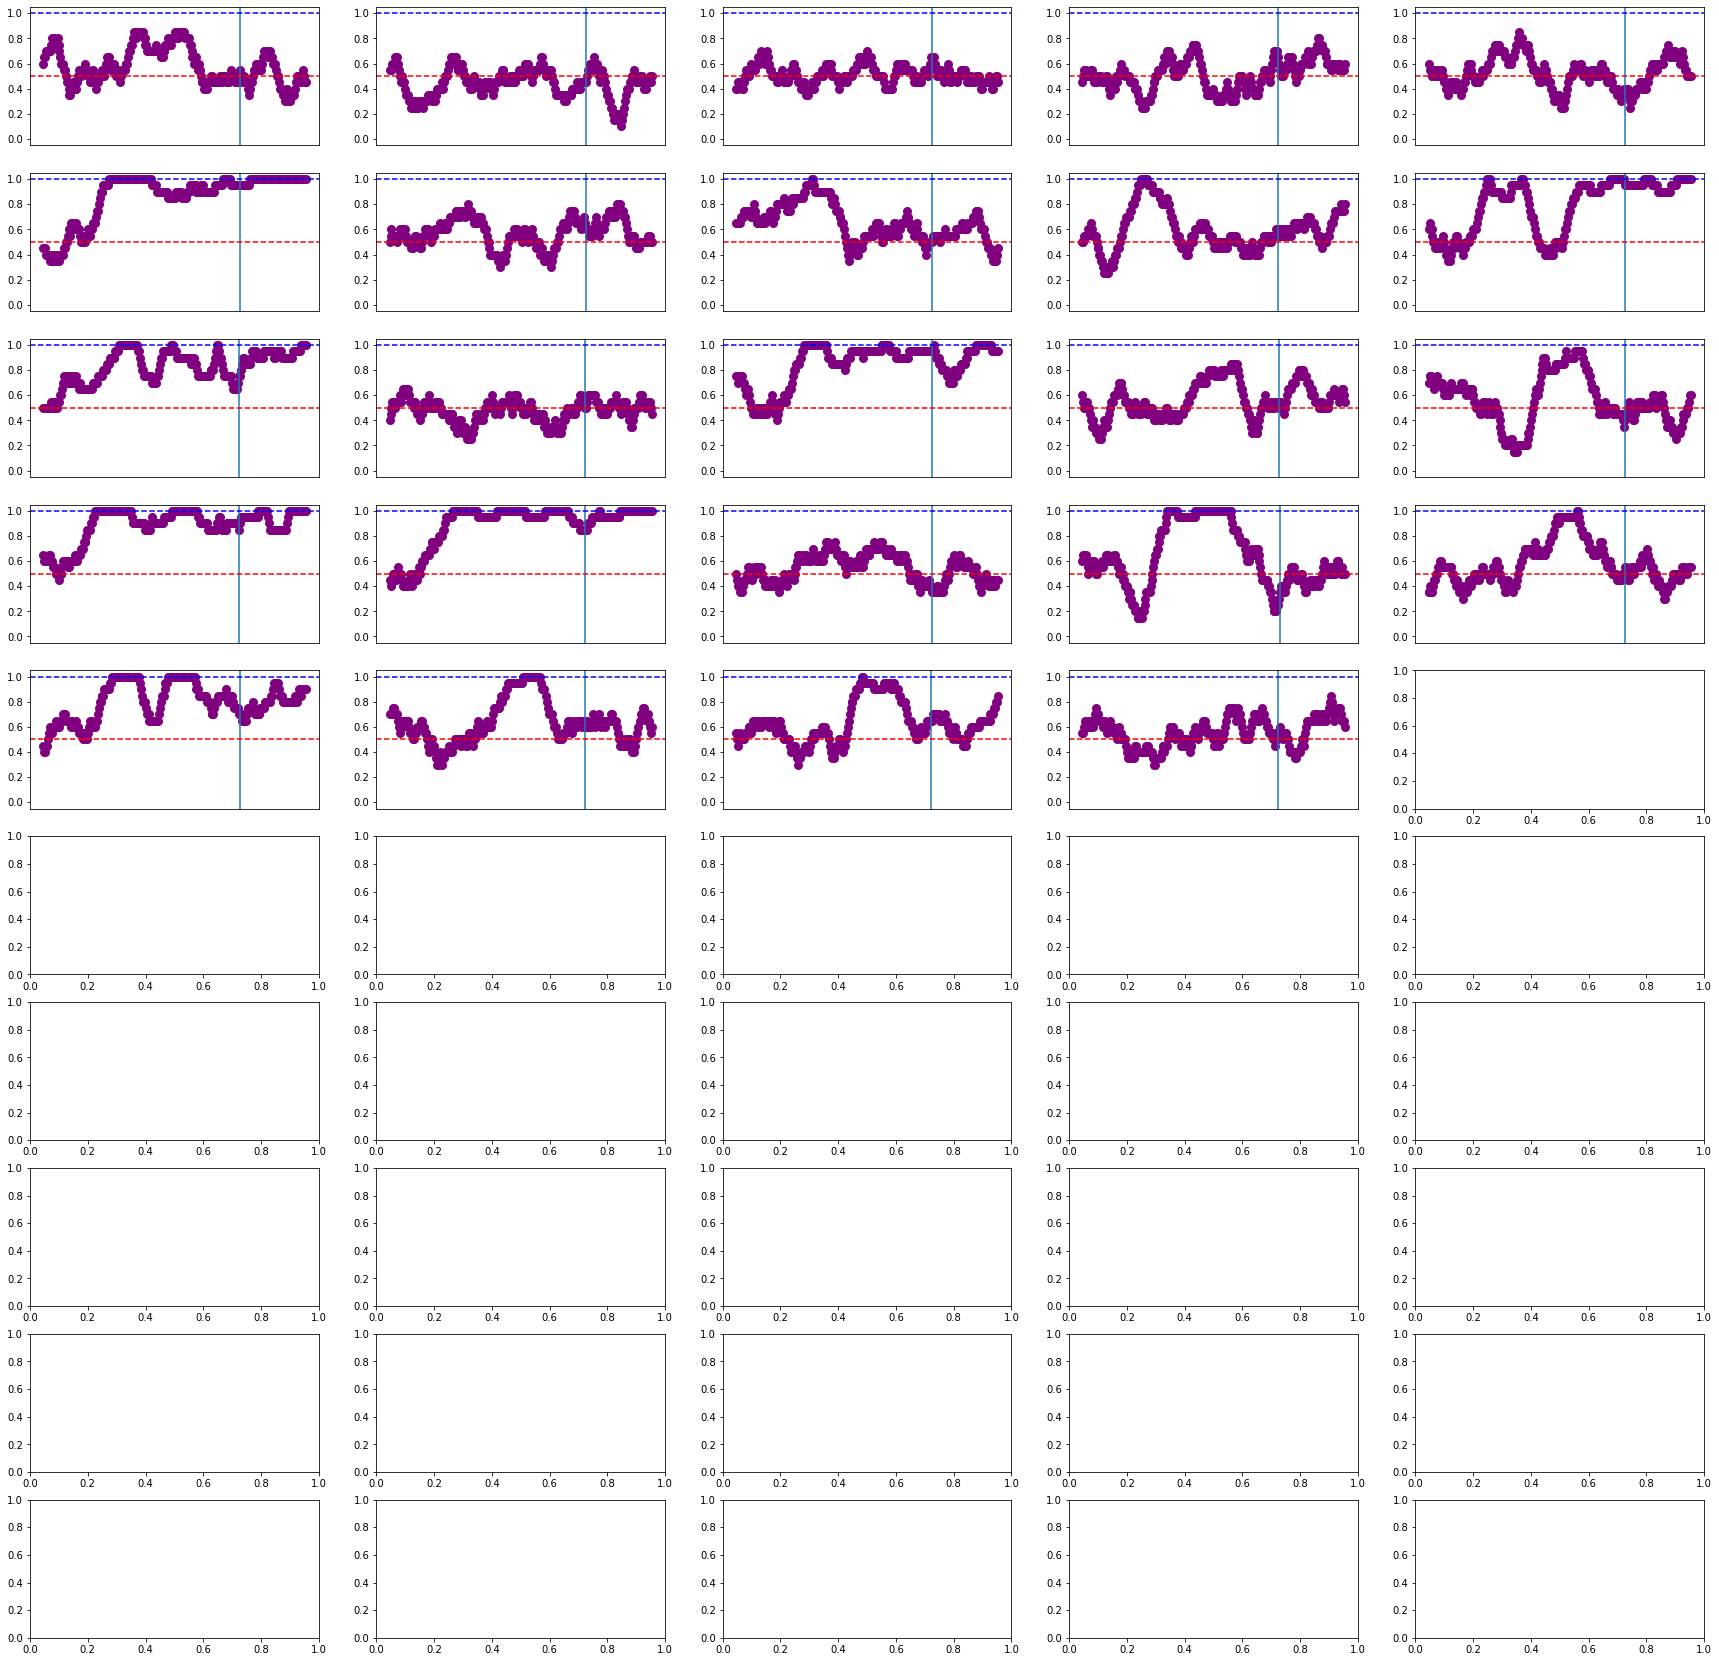

In [31]:
def mov_avg(A,wind):
  N = len(A)-wind
  M = -np.ones([N])
  for t in range(N):
    M[t] = A[t:t+wind].mean()
  return M


for MA_WINDOW in [1,5,20]:
  subj_data = plt_group_tqdf.correct_response.groupby(['subjnum'])
  subj_data_plt = subj_data.apply(mov_avg,MA_WINDOW)

  plt.close('all')
  fig,axarr = plt.subplots(10,5,figsize=(30,30));axarr=axarr.reshape(-1)
  for plt_idx,sub_idx in enumerate(subj_data_plt.index):
    ax = axarr[plt_idx]
    sub_ma = subj_data_plt[sub_idx]
    ax.scatter(range(len(sub_ma)),sub_ma,c='purple',lw=3)
    ax.axvline(int(len(sub_ma)*(4/5))-15)
    ax.set_xticks([])
    ax.set_ylim(-0.05,1.05)
    ax.axhline(0.5,c='r',ls='--')
    ax.axhline(1,c='b',ls='--')

  title = 'subs_%s_window_%i'%(CONDITION,MA_WINDOW)
  plt.savefig('figures/2020/subject/'+title)